In [1]:
#importing Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error
import warnings
from math import sqrt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")
import datetime

import plotly.express as px  # For Plotly plots
%matplotlib inline

# Importing package for statistical analysis
from statsmodels.distributions.empirical_distribution import ECDF  # For empirical distribution function

# Importing package for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose  # For seasonal decomposition of time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots


In [2]:
#loading the dataset
#train dataset
train = pd.read_csv('notebook/data/rossmann-store-sales/train.csv', parse_dates=['Date'], index_col='Date')
store = pd.read_csv('notebook/data/rossmann-store-sales/store.csv')
#test data
test = pd.read_csv('notebook/data/rossmann-store-sales/test.csv')

train=train.reset_index()

In [3]:
train.describe()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,2014-04-11 01:30:42.846061824,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
min,2013-01-01 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2013-08-17 00:00:00,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,2014-04-02 00:00:00,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,2014-12-12 00:00:00,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,2015-07-31 00:00:00,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00
std,NaN,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01


In [4]:
train.shape

(1017209, 9)

In [5]:
train.head(2)


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2015-07-31,1,5,5263,555,1,1,0,1
1,2015-07-31,2,5,6064,625,1,1,0,1


In [6]:
test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [7]:
store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [8]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [9]:
train.duplicated().sum()

0

In [10]:
train_cleaned=train.drop_duplicates()

In [11]:
train.isnull().sum()

Date             0
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
train_cleaned.shape

(1017209, 9)

In [13]:
store.duplicated().sum()

0

In [14]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer


# Identify numerical and categorical columns
numerical_cols = store.select_dtypes(include=['number']).columns
categorical_cols = store.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns (mean) and categorical columns (most frequent)
store[numerical_cols] = SimpleImputer(strategy='mean').fit_transform(store[numerical_cols])
store[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(store[categorical_cols])

# Check for remaining missing values
print(store.isnull().sum())


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [16]:
train_df = pd.merge(train,store, on='Store', how='inner')
print(train_df.head())


        Date  Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0 2015-07-31      1          5   5263        555     1      1            0   
1 2015-07-31      2          5   6064        625     1      1            0   
2 2015-07-31      3          5   8314        821     1      1            0   
3 2015-07-31      4          5  13995       1498     1      1            0   
4 2015-07-31      5          5   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0     0.0   
1                       11

In [17]:
train_df.shape

(1017209, 18)

In [18]:
train_df.describe()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,2014-04-11 01:30:42.846061824,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430020e+03,7.223450e+00,2.008683e+03,5.005638e-01,2.343209e+01,2.011758e+03
min,2013-01-01 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03
25%,2013-08-17 00:00:00,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,2.200000e+01,2.011764e+03
50%,2014-04-02 00:00:00,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,7.224704e+00,2.008669e+03,1.000000e+00,2.359545e+01,2.011764e+03
75%,2014-12-12 00:00:00,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.359545e+01,2.012000e+03
max,2015-07-31 00:00:00,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03
std,NaN,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.705298e+03,2.652674e+00,4.949376e+00,4.999999e-01,9.974306e+00,1.176502e+00


In [19]:
train_df.isnull().sum()

Date                         0
Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [20]:
train_df.duplicated().sum()

0

In [21]:
train_df=train_df.drop_duplicates()

In [22]:
train_df.shape

(1017209, 18)

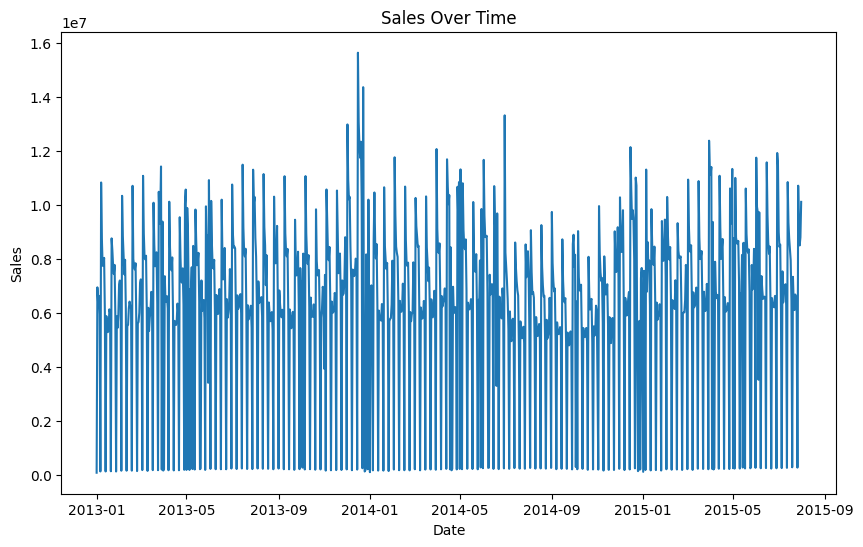

In [23]:
#Visualize Time Series Data: visualize the sales data to understand the trends and seasonality:


# Convert the 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Group by date and visualize
sales_by_date = train_df.groupby('Date')['Sales'].sum()

plt.figure(figsize=(10,6))
plt.plot(sales_by_date)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


Feature Engineering
Creating Time-Based Features
For time series forecasting, it is helpful to extract time-based features:

In [24]:
#converting the datetime column to day month and year separate columns
train_df['year'] = train_df['Date'].dt.year
train_df['month'] = train_df['Date'].dt.month
train_df['day'] = train_df['Date'].dt.day
train_df['day_of_week'] = train_df['Date'].dt.dayofweek



In [25]:
train_df.head(2)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,day_of_week
0,2015-07-31,1,5,5263,555,1,1,0,1,c,...,9.0,2008.0,0.0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",2015,7,31,4
1,2015-07-31,2,5,6064,625,1,1,0,1,a,...,11.0,2007.0,1.0,13.000000,2010.000000,"Jan,Apr,Jul,Oct",2015,7,31,4


In [26]:
train_df['SalePerCustomer'] = train_df['Sales']/train_df['Customers']
train_df['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [27]:
train_df.head(2)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,day_of_week,SalePerCustomer
0,2015-07-31,1,5,5263,555,1,1,0,1,c,...,2008.0,0.0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",2015,7,31,4,9.482883
1,2015-07-31,2,5,6064,625,1,1,0,1,a,...,2007.0,1.0,13.000000,2010.000000,"Jan,Apr,Jul,Oct",2015,7,31,4,9.702400


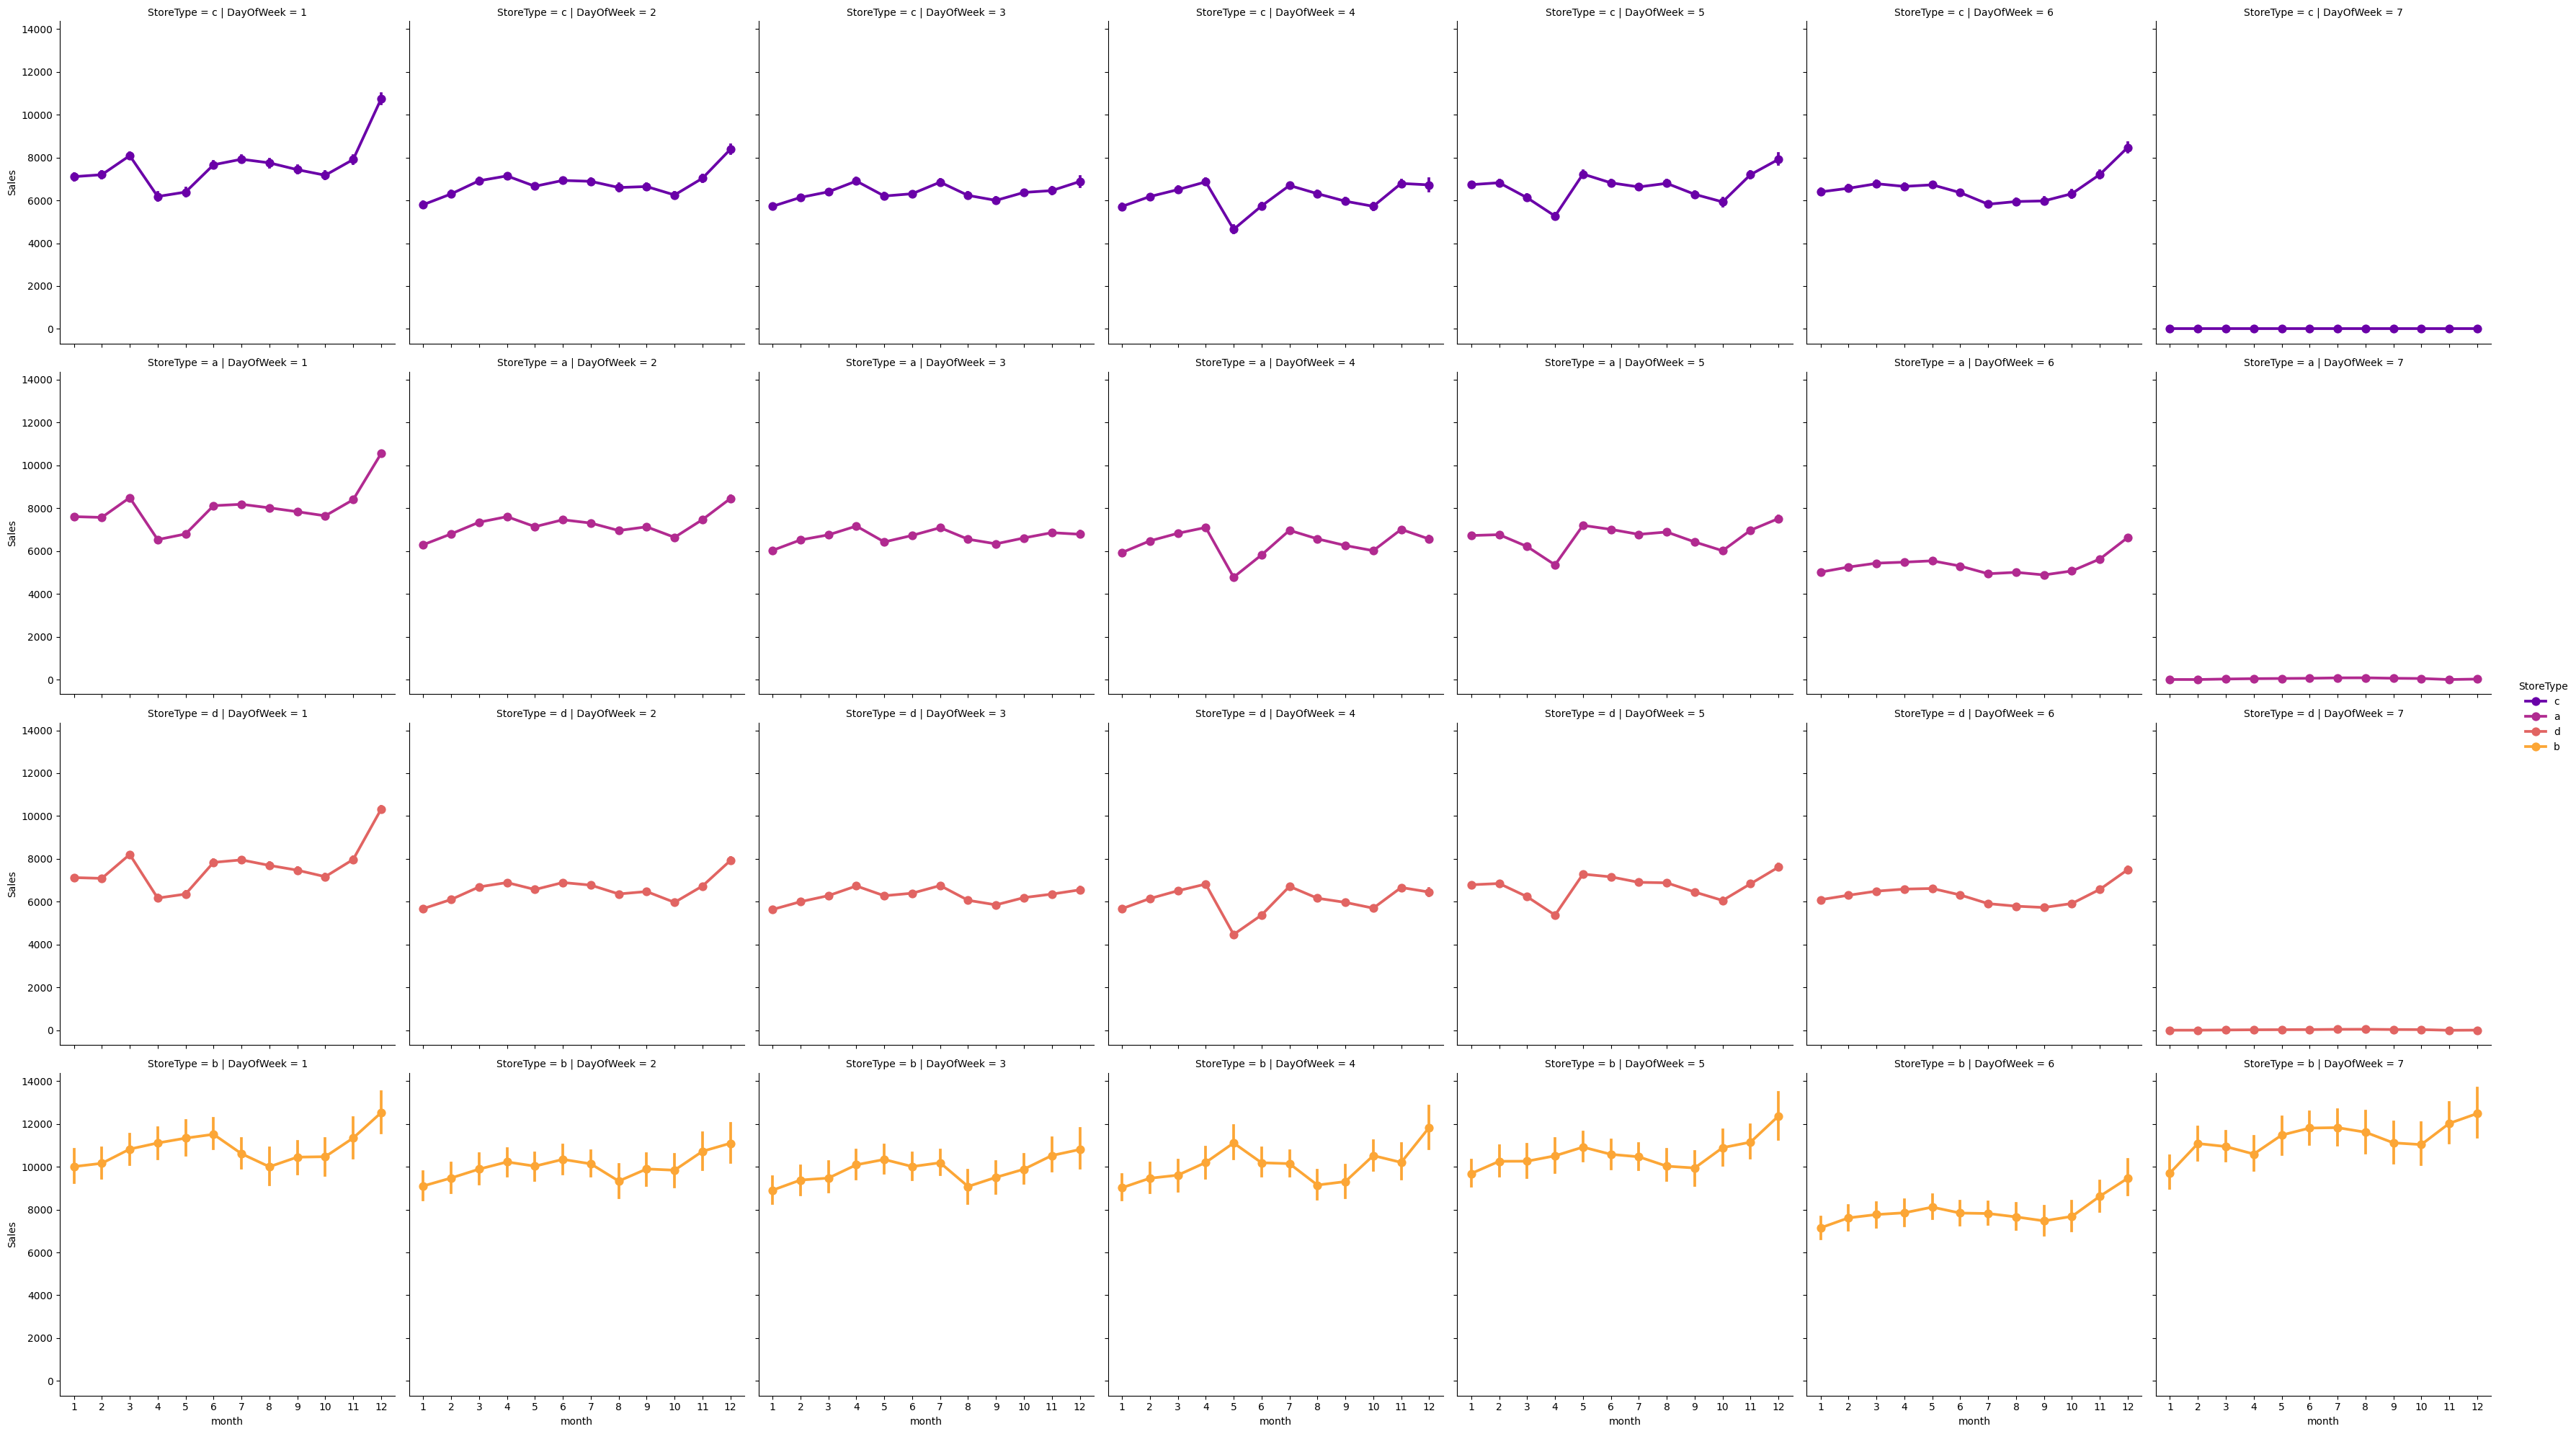

In [28]:
# customers
sns.catplot(data = train_df, x = 'month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               color = 'c',
               kind= 'point') 

In [29]:
# stores which are opened on Sundays
train_df[(train_df.Open == 1) & (train_df.DayOfWeek == 7)]['Store'].unique().sum()

19417

In [30]:
train_df[(train_df.Open == 1) & (train_df.StateHoliday == 1)]['Store'].unique().sum()

0

In [31]:
train_df[(train_df.Open == 1) & (train_df.SchoolHoliday == 1)]['Store'].unique().sum()

622170

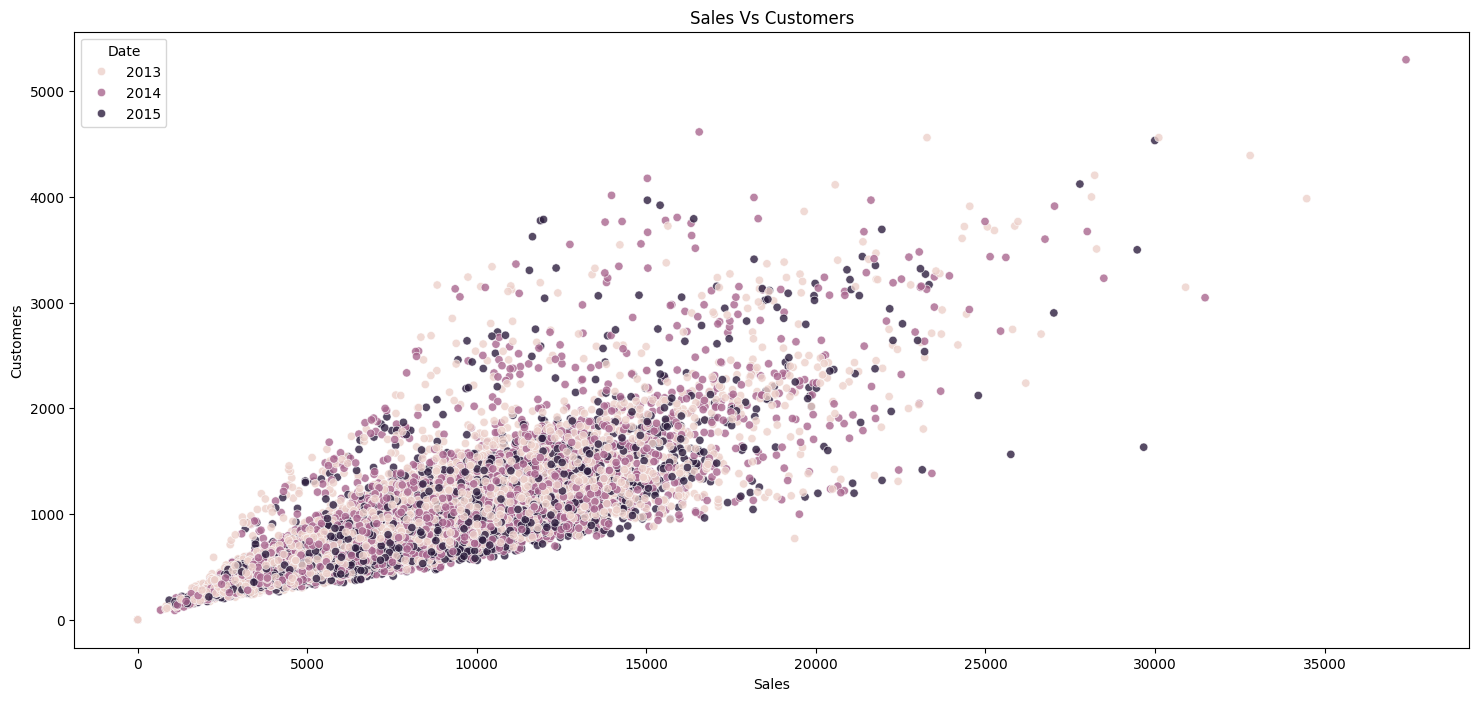

In [32]:
plt.figure(figsize=(18,8))
temp_df = train_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

In [33]:
train_df.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


In [34]:
train_df.groupby('month')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,103694.0,5465.395529,3572.685233,0.0,3577.00,5483.0,7464.0,32263.0
2,93660.0,5645.253150,3519.990270,0.0,3837.00,5610.0,7516.0,31649.0
3,103695.0,5784.578871,3871.175081,0.0,3705.00,5750.0,7885.0,36227.0
4,100350.0,5738.866916,3940.456503,0.0,3604.25,5718.0,7944.0,38722.0
5,103695.0,5489.639973,3983.233069,0.0,2941.50,5717.0,7827.0,38484.0
6,100350.0,5760.964375,3909.373300,0.0,3697.00,5729.0,7865.0,41551.0
7,98115.0,6064.915711,3640.947610,0.0,4151.00,5953.0,8009.0,32671.0
8,63550.0,5693.016554,3556.992585,0.0,3815.00,5633.0,7606.0,33913.0
9,61500.0,5570.246033,3542.059830,0.0,3731.00,5504.0,7445.0,32926.0


In [35]:
train_df.groupby('year')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2013,406974.0,5658.533675,3821.166174,0.0,3615.0,5598.0,7691.0,38025.0
2014,373855.0,5833.290704,3883.887435,0.0,3760.0,5794.0,7941.0,38037.0
2015,236380.0,5878.245380,3840.197055,0.0,3892.0,5916.0,7997.0,41551.0


In [36]:
train_df.groupby('StoreType')[['Customers', 'Sales']].sum()

,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


In [37]:
train_df.groupby(['StoreType','year','month'])[['Customers', 'Sales']].sum()

Customers      Sales
StoreType year month                      
a         2013 1       11687628   98821318
               2       10974388   93685217
               3       12431342  108820294
               4       11943060  100222624
               5       11680293   99900140
...                         ...        ...
d         2015 3        5471351   63757380
               4        5289662   61230116
               5        5086143   58803060
               6        5418957   64263846
               7        5608523   66269563

[124 rows x 2 columns]

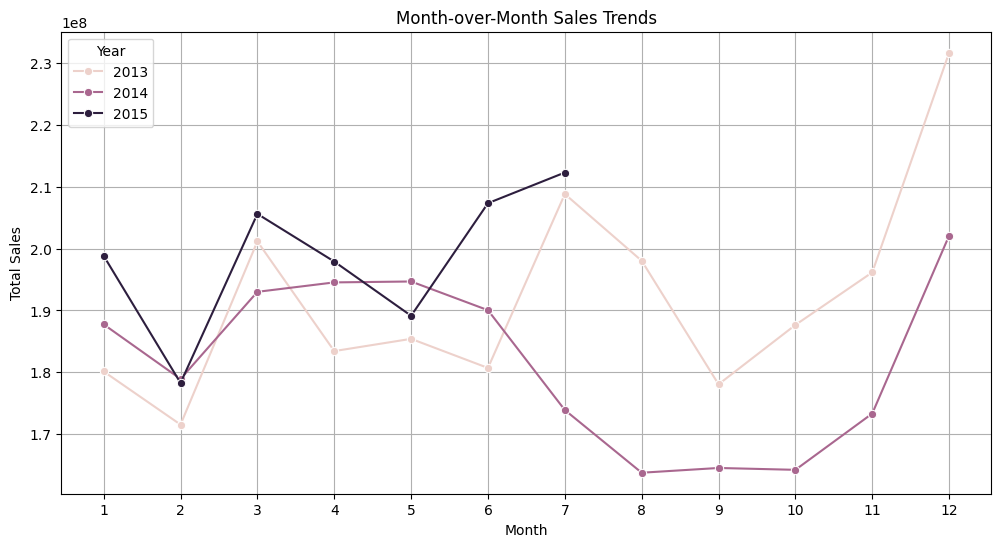

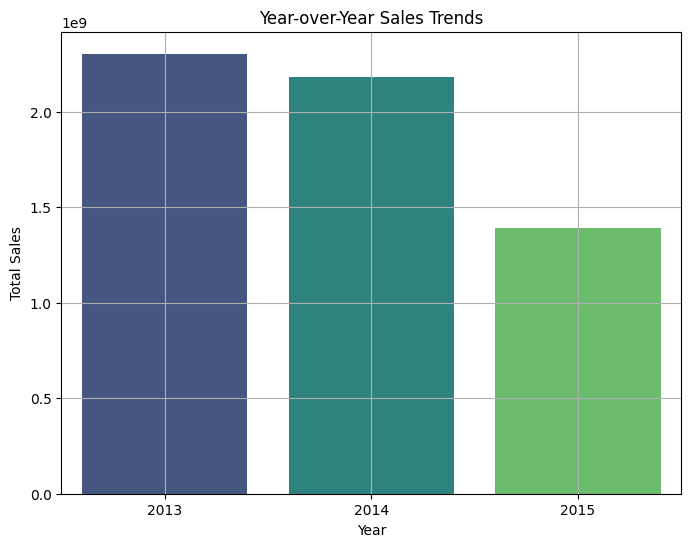

In [40]:

# Group data by year and month for MoM plotting
month_over_month = train_df.groupby(['year', 'month'])['Sales'].sum().reset_index()

# Plot Month-over-Month sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=month_over_month, x='month', y='Sales', hue='year', marker='o')
plt.title('Month-over-Month Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))  # Show months from 1 to 12
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Group data by year for YoY plotting
year_over_year = train_df.groupby(['year'])['Sales'].sum().reset_index()

# Plot Year-over-Year sales trends
plt.figure(figsize=(8, 6))
sns.barplot(data=year_over_year, x='year', y='Sales', palette='viridis')
plt.title('Year-over-Year Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


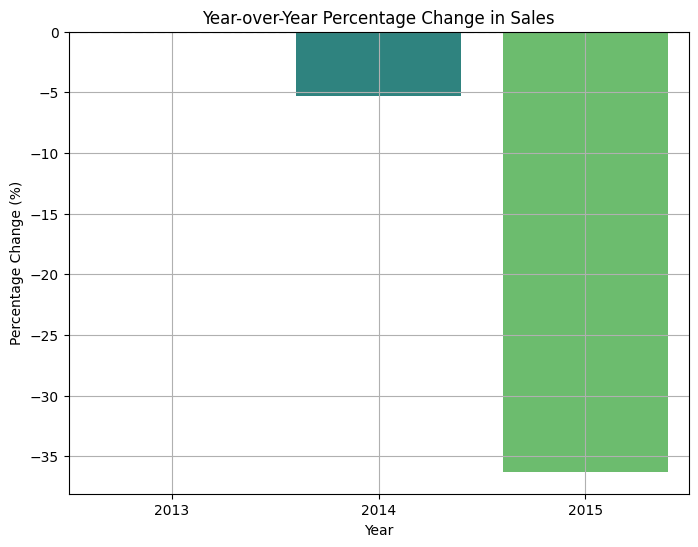

In [41]:
# Calculate percentage change year-over-year
year_over_year['YoY_Percent_Change'] = year_over_year['Sales'].pct_change() * 100

# Plot Year-over-Year Percentage Change in Sales
plt.figure(figsize=(8, 6))
sns.barplot(data=year_over_year, x='year', y='YoY_Percent_Change', palette='viridis')
plt.title('Year-over-Year Percentage Change in Sales')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.axhline(0, color='gray', linestyle='--')  # Show the zero percentage change line
plt.grid(True)
plt.show()

posx and posy should be finite values
posx and posy should be finite values


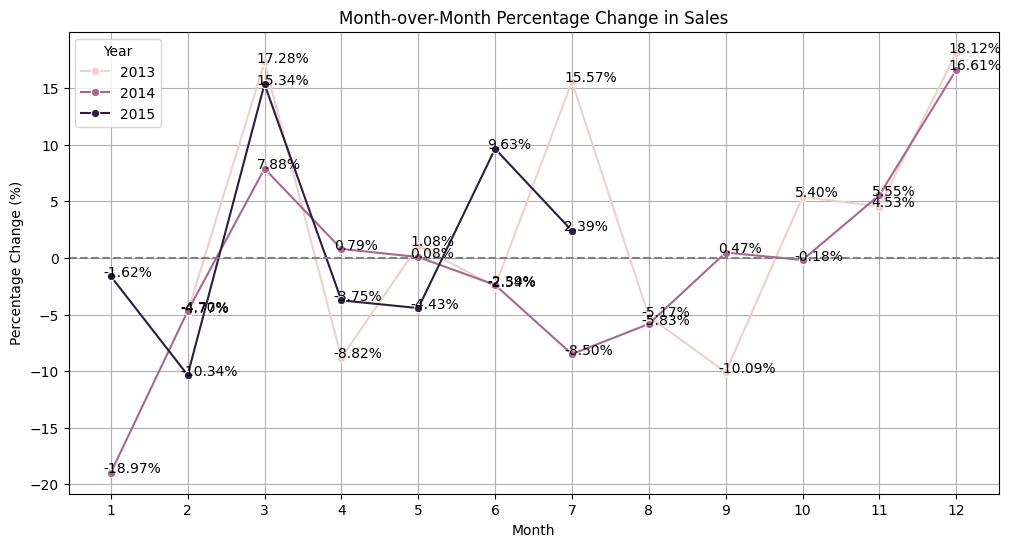

posx and posy should be finite values
posx and posy should be finite values


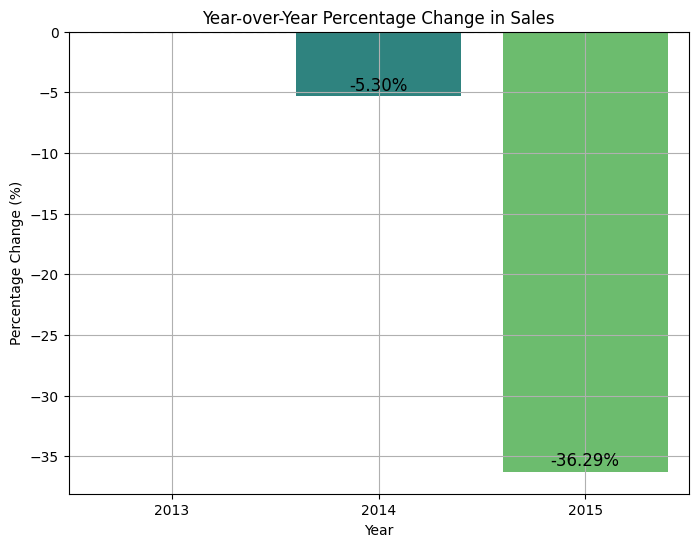

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df is already loaded and processed

# Convert 'Date' column to datetime if not already done
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Extract year and month for grouping
train_df['year'] = train_df['Date'].dt.year
train_df['month'] = train_df['Date'].dt.month

# Group data by year and month for MoM analysis
month_over_month = train_df.groupby(['year', 'month'])['Sales'].sum().reset_index()

# Calculate percentage change month-over-month
month_over_month['MoM_Percent_Change'] = month_over_month['Sales'].pct_change() * 100

# Plot Month-over-Month Percentage Change in Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=month_over_month, x='month', y='MoM_Percent_Change', hue='year', marker='o')

# Annotate points with their percentage change values
for i in range(month_over_month.shape[0]):
    plt.text(x=month_over_month['month'][i] - 0.1, 
             y=month_over_month['MoM_Percent_Change'][i], 
             s=f"{month_over_month['MoM_Percent_Change'][i]:.2f}%", 
             fontsize=10, color='black')

plt.title('Month-over-Month Percentage Change in Sales')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.xticks(range(1, 13))  # Show months from 1 to 12
plt.axhline(0, color='gray', linestyle='--')  # Show the zero percentage change line
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Group data by year for YoY analysis
year_over_year = train_df.groupby('year')['Sales'].sum().reset_index()

# Calculate percentage change year-over-year
year_over_year['YoY_Percent_Change'] = year_over_year['Sales'].pct_change() * 100

# Plot Year-over-Year Percentage Change in Sales
plt.figure(figsize=(8, 6))
sns.barplot(data=year_over_year, x='year', y='YoY_Percent_Change', palette='viridis')

# Annotate bars with their percentage change values
for i in range(year_over_year.shape[0]):
    plt.text(x=i, 
             y=year_over_year['YoY_Percent_Change'][i] + 0.5,  # Adding offset to avoid overlap
             s=f"{year_over_year['YoY_Percent_Change'][i]:.2f}%", 
             ha='center', fontsize=12, color='black')

plt.title('Year-over-Year Percentage Change in Sales')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.axhline(0, color='gray', linestyle='--')  # Show the zero percentage change line
plt.grid(True)
plt.show()


In [ ]:
# sales trends
sns.catplot(data = train_df, x = 'month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = 'c',
               kind='point') 

In [ ]:
# sale per customer trends
sns.catplot(data = train_df, x = 'month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = 'c',
               kind='point') 

In [ ]:
for col in train_df[['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval','SchoolHoliday']]:
    unique_values = train_df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

In [ ]:
import numpy as np
# Compute the correlation matrix 
# exclude 'Open' variable
numerical_columns = train_df.select_dtypes(include=[np.number])  #Some variables are still object
                                                                    # (['StateHoliday', 'StoreType',
                                                                    #'Assortment', 'PromoInterval']) We will exclude them.
corr_all = numerical_columns.drop(['Open'], axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [ ]:
# sale per customer trends
sns.catplot(data = train_df, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu',
               kind='point') 

In [ ]:
train_df.info()

**PROPHET**


In [ ]:
# importing data
df = pd.read_csv('notebook/data/rossmann-store-sales/train.csv', low_memory=False)

# remove closed stores and those with no sales
df = df[(df["Open"] != 0) & (df['Sales'] != 0)]

# sales for the store number 1 (StoreType C)
sales = df[df.Store == 1].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales.dtypes

In [ ]:
# from the prophet documentation every variables should have specific names
sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales.head()
#The sales DataFrame should have at least two columns:
#ds: A column that contains the date values in YYYY-MM-DD or similar formats.
#y: A column that contains the values you want to predict (in this case, sales).

In [ ]:
# plot daily sales
ax = sales.set_index('ds').plot(figsize = (12, 4), color = 'c')
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [ ]:
# create holidays dataframe
state_dates = df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') & (df.StateHoliday == 'c')].loc[:, 'Date'].values
school_dates = df[df.SchoolHoliday == 1].loc[:, 'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))      
holidays.head()


**Prophet is a forecasting tool developed by Facebook (now Meta), designed to handle time series data and predict future values with uncertainty intervals.**

In [ ]:
from prophet import Prophet
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays) # sets the width of the uncertainty interval to 95%, meaning you're expecting to capture 95% of the future values within the prediction bounds. The default value is 80%, but we’re changing it here to be more conservative by setting it to 95%.
my_model.fit(sales)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 6*7)

print("First week to forecast.")
future_dates.tail(7)

In [ ]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [122]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

In [ ]:
# visualizing predicions
my_model.plot(forecast)

In [ ]:
my_model.plot_components(forecast)

In [ ]:
fc.head()

In [ ]:
# Assuming 'ds' is the date column and 'yhat' is the prediction column in fc

# Reset the index to use it as Id
fc = fc.reset_index(drop=False)  # Drops the old index if needed

# Rename the index column to 'Id' (optional)
fc.rename(columns={'index': 'Id'}, inplace=True)  # Optional renaming
# Rename the index column to 'Id' (optional)
fc.rename(columns={'yhat': 'Sales'}, inplace=True)  # Optional renaming
# Select Id and yhat for submission dataframe
submission = fc[['Id', 'Sales']]

# Export the submission dataframe to a CSV file
submission.to_csv('notebook/data/rossmann-store-sales/submission_ani.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

In [ ]:
train_df.head(2)

In [ ]:
train_df.info()

**XGBOOST**


In [ ]:
#loading the dataset
#train dataset
train = pd.read_csv('notebook/data/rossmann-store-sales/train.csv', parse_dates=['Date'], index_col='Date')
store = pd.read_csv('notebook/data/rossmann-store-sales/store.csv')
#test data
test = pd.read_csv('notebook/data/rossmann-store-sales/test.csv')

train=train.reset_index()

In [180]:
#converting the datetime column to day month and year separate columns
train['Year'] = train_df['Date'].dt.year.astype('int64')
train['Month'] = train_df['Date'].dt.month.astype('int64')
train['day'] = train_df['Date'].dt.day.astype('int64')



In [ ]:
train.head(2)

In [ ]:
train.info()

In [187]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday','Open','SchoolHoliday', 'day', 'Month', 'Year']
target_col = 'Sales'



In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
import joblib
# Assuming train_df is your original DataFrame

# Separate features (X) and target variable (y)
X = train[input_cols]
y = train[target_col]

# Convert all categorical columns to strings
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].astype(str)

# Identify numerical and categorical columns after conversion
numerical_cols = X.select_dtypes(include=['int','float']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define the preprocessor: StandardScaler for numerical columns and OneHotEncoder for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
            ('scaler', StandardScaler())                 # Standardize numerical features
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore'))    # Encode categorical features
        ]), categorical_cols)
    ])

# Define the pipeline that includes the preprocessor and the XGBRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'model__n_estimators': randint(100, 500),  # Number of trees in the ensemble
    'model__max_depth': randint(3, 10),        # Maximum depth of a tree
    'model__learning_rate': uniform(0.01, 0.3), # Learning rate (shrinkage)
    'model__subsample': uniform(0.6, 0.4),      # Subsample ratio of the training instance
    'model__colsample_bytree': uniform(0.5, 0.4), # Subsample ratio of columns for each tree
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=50, scoring='neg_mean_squared_error', 
    cv=6, verbose=1, n_jobs=-1, random_state=42
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)

# Best parameters found
print(f"Best Parameters: {random_search.best_params_}")

# Evaluate the model with the best parameters on the test set
test_score = random_search.score(X_test, y_test)

print(f"Test score: {test_score}")

with open('xgb_model.pkl', 'wb') as model_file:
    joblib.dump(random_search.best_estimator_, model_file)


In [189]:
#testing the pickle file

# Ensure the 'Date' column is in datetime format
test['Date'] = pd.to_datetime(test['Date'])

# Extract year, month, and day from the 'Date' column
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['day'] = test['Date'].dt.day




# Remove columns that were not used in training
new_test = test.drop(['Date', 'Id'], axis=1)



In [ ]:
test.head(2)

In [ ]:
import joblib

# Load the trained model
with open('xgb_model.pkl', 'rb') as model_file:
    model = joblib.load(model_file)

# Make predictions on the new test data
y_pred = model.predict(new_test)
y_predmean=y_pred.mean()
print(f"mean: {y_predmean}")
# Optionally, save predictions to a CSV file
submission_df = pd.DataFrame({'Id': test['Id'], 'Sales': y_pred})
submission_df.to_csv('submission.csv', index=False)


In [44]:
#debugging : error : AttributeError: np.float_ was removed in the NumPy 2.0 release. Use np.float64 instead.
#import numpy
#numpy.__version__
#pip install numpy==1.23.5 
#pip install --upgrade prophet

In [ ]:
"""
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train, y_train, epochs=200, verbose=0)

# Forecast
forecast = model.predict(X_test)
"""